# Bring it all together

Combine the CMAQ response with the PM2.5 sensor values and wind directions, speeds, and pressure

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def to_gdf(df, lat_col='latitude', lon_col='longitude'):
    return gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df[lon_col], df[lat_col]), crs="EPSG:4326")

In [3]:
wind = pd.read_csv("meteostat/daily_wind_station_data_loc_2010-2021.csv.gz", dtype = {'station': 'string'})
windgeo = to_gdf(wind)
windgeo

station        time  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt  \
0         69007  2021-01-02   8.6   5.0  12.0   2.2   NaN   43.0   5.9   NaN   
1         69007  2021-01-03  10.5   9.0  15.0   1.0   NaN   74.0   5.6   NaN   
2         69007  2021-01-04   9.7   5.0  15.0   2.2   NaN  173.0  10.2   NaN   
3         69007  2021-01-05   7.4   2.0  15.0   0.0   NaN   69.0   6.4   NaN   
4         69007  2021-01-06   7.8   3.0  16.0   0.0   NaN   69.0   4.5   NaN   
...         ...         ...   ...   ...   ...   ...   ...    ...   ...   ...   
4003578   U9ANI  2021-12-27   1.0   0.0   3.3   0.0   NaN  258.0  24.7   NaN   
4003579   U9ANI  2021-12-28   1.1   0.6   3.3  40.1   NaN  261.0  27.4   NaN   
4003580   U9ANI  2021-12-29   2.4  -0.6   3.9  16.0   NaN  226.0  12.8   NaN   
4003581   U9ANI  2021-12-30   3.7   0.6   6.7   2.5   NaN   90.0   7.3   NaN   
4003582   U9ANI  2021-12-31   3.9   1.1   7.2   2.8   NaN  271.0  16.0   NaN   

           pres  tsun  latitude  longitude                geometry  
0        1024.2   NaN   36.6815  -121.7617  POINT (-121.76 36.681)  
1        1024.0   NaN   36.6815  -121.7617  POINT (-121.76 36.681)  
2        1022.2   NaN   36.6815  -121.7617  POINT (-121.76 36.681)  
3        1024.3   NaN   36.6815  -121.7617  POINT (-121.76 36.681)  
4        1023.4   NaN   36.6815  -121.7617  POINT (-121.76 36.681)  
...         ...   ...       ...        ...                     ...  
4003578  1016.6   NaN   33.0833  -116.6300  POINT (-116.63 33.083)  
4003579  1011.4   NaN   33.0833  -116.6300  POINT (-116.63 33.083)  
4003580  1013.5   NaN   33.0833  -116.6300  POINT (-116.63 33.083)  
4003581  1012.6   NaN   33.0833  -116.6300  POINT (-116.63 33.083)  
4003582  1008.0   NaN   33.0833  -116.6300  POINT (-116.63 33.083)  

[4003583 rows x 15 columns]

In [4]:
year = 2010

In [5]:
cmaq = pd.read_csv(f"CMAQ/summarized/{year}_CMAQ_5x5.csv.gz")
cmaqSquares = gpd.read_file(f"CMAQ/summarized/{year}_CMAQ_5x5_squares.shp")

In [6]:
PM25_88101 = pd.read_csv(f"PM2.5/daily_88101_{year}.zip")
PM25_88502 = pd.read_csv(f"PM2.5/daily_88502_{year}.zip", low_memory=False)
PM25_88101.shape

(230028, 29)

In [7]:
PM25 = pd.concat((PM25_88101, PM25_88502))
PM25.shape

(588346, 29)

In [8]:
states = gpd.read_file("cb_2018_us_state_5m.zip")

In [9]:
states

STATEFP   STATENS     AFFGEOID GEOID STUSPS  \
0       31  01779792  0400000US31    31     NE   
1       53  01779804  0400000US53    53     WA   
2       35  00897535  0400000US35    35     NM   
3       46  01785534  0400000US46    46     SD   
4       48  01779801  0400000US48    48     TX   
5       06  01779778  0400000US06    06     CA   
6       21  01779786  0400000US21    21     KY   
7       39  01085497  0400000US39    39     OH   
8       01  01779775  0400000US01    01     AL   
9       13  01705317  0400000US13    13     GA   
10      55  01779806  0400000US55    55     WI   
11      41  01155107  0400000US41    41     OR   
12      42  01779798  0400000US42    42     PA   
13      28  01779790  0400000US28    28     MS   
14      29  01779791  0400000US29    29     MO   
15      37  01027616  0400000US37    37     NC   
16      40  01102857  0400000US40    40     OK   
17      54  01779805  0400000US54    54     WV   
18      36  01779796  0400000US36    36     NY   
19      18  00448508  0400000US18    18     IN   
20      20  00481813  0400000US20    20     KS   
21      16  01779783  0400000US16    16     ID   
22      32  01779793  0400000US32    32     NV   
23      50  01779802  0400000US50    50     VT   
24      30  00767982  0400000US30    30     MT   
25      27  00662849  0400000US27    27     MN   
26      38  01779797  0400000US38    38     ND   
27      15  01779782  0400000US15    15     HI   
28      04  01779777  0400000US04    04     AZ   
29      10  01779781  0400000US10    10     DE   
30      44  01219835  0400000US44    44     RI   
31      08  01779779  0400000US08    08     CO   
32      49  01455989  0400000US49    49     UT   
33      51  01779803  0400000US51    51     VA   
34      56  01779807  0400000US56    56     WY   
35      22  01629543  0400000US22    22     LA   
36      26  01779789  0400000US26    26     MI   
37      25  00606926  0400000US25    25     MA   
38      12  00294478  0400000US12    12     FL   
39      78  01802710  0400000US78    78     VI   
40      09  01779780  0400000US09    09     CT   
41      34  01779795  0400000US34    34     NJ   
42      24  01714934  0400000US24    24     MD   
43      45  01779799  0400000US45    45     SC   
44      23  01779787  0400000US23    23     ME   
45      33  01779794  0400000US33    33     NH   
46      11  01702382  0400000US11    11     DC   
47      66  01802705  0400000US66    66     GU   
48      69  01779809  0400000US69    69     MP   
49      60  01802701  0400000US60    60     AS   
50      19  01779785  0400000US19    19     IA   
51      72  01779808  0400000US72    72     PR   
52      05  00068085  0400000US05    05     AR   
53      47  01325873  0400000US47    47     TN   
54      17  01779784  0400000US17    17     IL   
55      02  01785533  0400000US02    02     AK   

                                            NAME LSAD          ALAND  \
0                                       Nebraska   00   198956658395   
1                                     Washington   00   172112588220   
2                                     New Mexico   00   314196306401   
3                                   South Dakota   00   196346981786   
4                                          Texas   00   676653171537   
5                                     California   00   403503931312   
6                                       Kentucky   00   102279490672   
7                                           Ohio   00   105828882568   
8                                        Alabama   00   131174048583   
9                                        Georgia   00   149482048342   
10                                     Wisconsin   00   140290039723   
11                                        Oregon   00   248606993270   
12                                  Pennsylvania   00   115884442321   
13                                   Mississippi   00   121533519481   
14                                      Missouri   00   178050802184   


In [10]:
states = states[~states["NAME"].isin(
    {"United States Virgin Islands", 
     "Alaska", "Hawaii", "Puerto Rico", 
     "American Samoa", "Commonwealth of the Northern Mariana Islands", 
     "Guam"})]

In [11]:
PM25geo = to_gdf(PM25, 'Latitude', 'Longitude')

In [12]:
m = cmaqSquares.explore(color='grey')
m = PM25geo.drop_duplicates(('Latitude', 'Longitude')).explore(m=m, color='blue')
windgeo.drop_duplicates('station').explore(m=m, color='red')

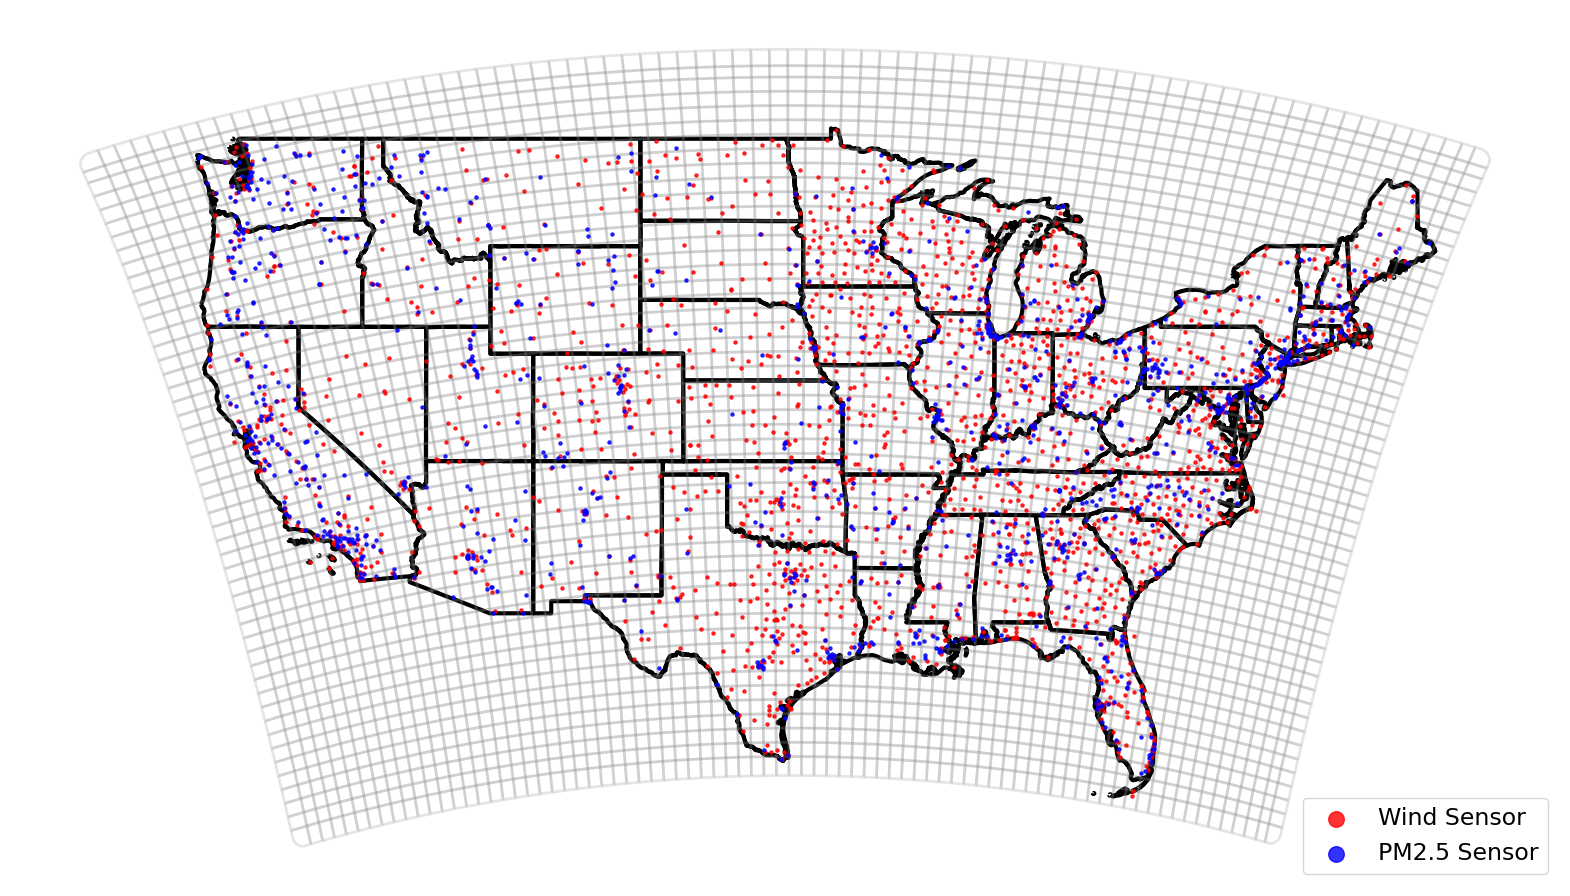

In [33]:
cmaqSquares4326 = cmaqSquares.to_crs("EPSG:4326")
cmaqSquares4326ex = cmaqSquares4326.boundary

PMplt = PM25geo.drop_duplicates(('Latitude', 'Longitude')).to_crs("EPSG:4326").overlay(cmaqSquares4326, how='intersection')
windplt = windgeo.drop_duplicates('station').to_crs("EPSG:4326").overlay(cmaqSquares4326, how='intersection')

m = states.boundary.plot(linewidth = 3, color = 'black', figsize=(20,15), zorder=0)
m = cmaqSquares4326ex.plot(ax = m,color = 'grey', linewidth = 2, alpha = 0.2, zorder=2)
m = windplt.plot(ax = m, color = 'red', zorder=5, markersize = 5, alpha = 0.8, label = "Wind Sensor")
m = PMplt.plot(ax = m, color = 'blue', zorder=10, markersize = 5, alpha = 0.8, label = "PM2.5 Sensor").set_axis_off()
plt.legend(loc='lower right', markerscale = 5, prop={'size': 17})
plt.savefig('dataMap.svg')
plt.savefig('dataMap.png', dpi=300, bbox_inches = 'tight')